<a href="https://colab.research.google.com/github/mohantechis/Asian_and_African_Elephant_classification/blob/main/Asian_vs_African_Elephants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Library

In [69]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import random
import PIL
import pathlib

Checking the version of Tensorflow

In [70]:
print(tf.__version__)

2.7.0


Creating the path of Train and test directory

In [71]:
train_dir=pathlib.Path("/content/drive/MyDrive/Dataset/dataset/train",shuffle=True,random_state=3)
test_dir=pathlib.Path("/content/drive/MyDrive/Dataset/dataset/test",shuffle=True,random_state=2)

In [72]:
classes = os.listdir(train_dir)
print(classes)

['African', 'Asian']


Counting the image of train and test 

In [73]:
train_image_count = len(list(train_dir.glob('*/*')))
print("Total Image in Training Dataset: ",train_image_count)

Total Image in Training Dataset:  840


In [74]:
train_African_image_count = len(list(train_dir.glob('*African/*')))
train_Asian_image_count = len(list(train_dir.glob('*Asian/*')))
print("Total Image  of African Elephant in Training Dataset:",train_African_image_count)
print("Total Image  of Asian Elephant in Training Dataset:",train_Asian_image_count)

Total Image  of African Elephant in Training Dataset: 420
Total Image  of Asian Elephant in Training Dataset: 420


In [75]:
test_image_count = len(list(test_dir.glob('*/*')))
print("Total Image in Test Dataset: ",test_image_count)

Total Image in Test Dataset:  188


In [76]:
test_African_image_count = len(list(test_dir.glob('*African/*')))
test_Asian_image_count = len(list(test_dir.glob('*Asian/*')))
print("Total Image  of African Elephant in Testing Dataset:",test_African_image_count)
print("Total Image  of Asian Elephant in Testing Dataset:",test_Asian_image_count)

Total Image  of African Elephant in Testing Dataset: 97
Total Image  of Asian Elephant in Testing Dataset: 91


# Data Visaulisation

African Elephant Image

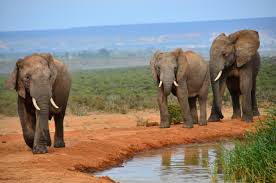

In [77]:
african=list(train_dir.glob("*African/*"))
PIL.Image.open(str(african[0]))

Asian Elephant Image

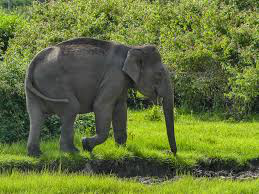

In [78]:
asian=list(train_dir.glob("*Asian/*"))
PIL.Image.open(str(asian[0]))

Loading the Dataset

In [79]:
batch_size=64
img_height=180
img_width=180
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
image_size=(img_height, img_width),batch_size=batch_size,shuffle=True)

Found 840 files belonging to 2 classes.


In [80]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
image_size=(img_height, img_width),batch_size=batch_size,shuffle=True)

Found 188 files belonging to 2 classes.


# Model

In [81]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomCrop(img_height,img_width ),
    layers.RandomContrast(0.15),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

In [82]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1 , activation = 'sigmoid')
])

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [85]:
epochs = 40
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/40
14/14 [==============================] - 104s 5s/step - loss: 0.8142 - accuracy: 0.4964 - val_loss: 0.6635 - val_accuracy: 0.6223
Epoch 2/40
14/14 [==============================] - 34s 2s/step - loss: 0.6703 - accuracy: 0.5988 - val_loss: 0.7323 - val_accuracy: 0.5213
Epoch 3/40
14/14 [==============================] - 34s 2s/step - loss: 0.6847 - accuracy: 0.5702 - val_loss: 0.6843 - val_accuracy: 0.4947
Epoch 4/40
14/14 [==============================] - 34s 2s/step - loss: 0.6935 - accuracy: 0.5119 - val_loss: 0.6910 - val_accuracy: 0.5532
Epoch 5/40
14/14 [==============================] - 34s 2s/step - loss: 0.6838 - accuracy: 0.5845 - val_loss: 0.6678 - val_accuracy: 0.5957
Epoch 6/40
14/14 [==============================] - 34s 2s/step - loss: 0.6846 - accuracy: 0.5667 - val_loss: 0.6565 - val_accuracy: 0.6064
Epoch 7/40
14/14 [==============================] - 34s 2s/step - loss: 0.6774 - accuracy: 0.5821 - val_loss: 0.6463 - val_accuracy: 0.6330
Epoch 8/40
14/14 [=

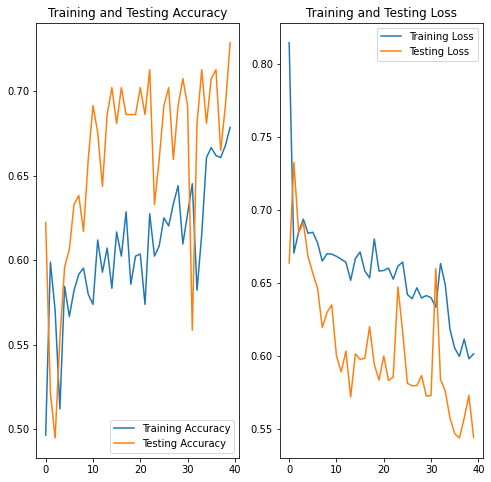

In [87]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

In [90]:
# Model Accuracy
train_loss,train_accuracy = model.evaluate_generator(train_ds)
test_loss,test_accuracy = model.evaluate_generator(test_ds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
print("Training Accuracy: ", round(train_accuracy*100,2),"%",    "Training Loss:",round(train_loss,2))
print("Test Accuracy: ", round(test_accuracy*100,2),"%",         "Test Loss:",round(test_loss,2))

Training Accuracy:  70.24 % Training Loss: 0.57
Test Accuracy:  72.87 % Test Loss: 0.54
